# Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

In [3]:
import seaborn as sns

In [4]:
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
sns.set_theme(style="darkgrid")

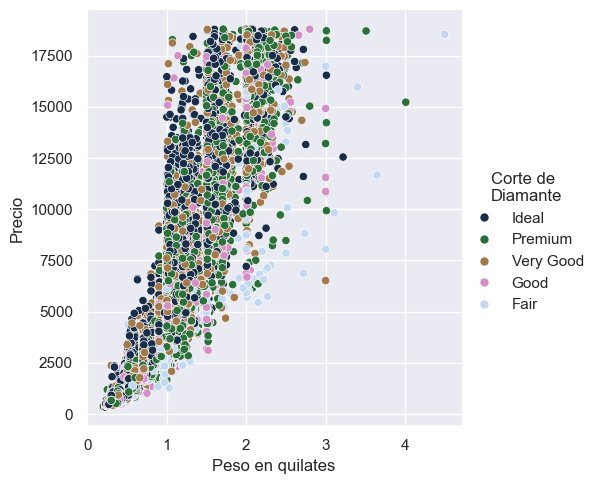

In [6]:
datos_muestra = diamonds.sample(frac=0.6)
g1 = sns.relplot(data=datos_muestra,
            x="carat",
            y="price",
            hue="cut",
            palette="cubehelix")

g1.set_axis_labels("Peso en quilates", "Precio")
g1.legend.set_title("Corte de\nDiamante");
#mostramos el 60% de los datos

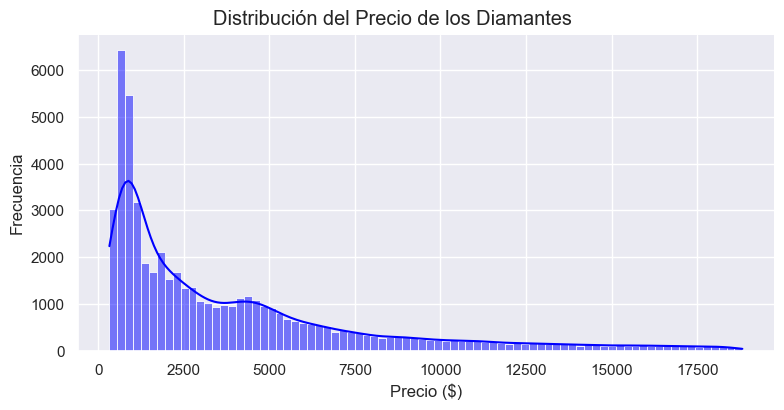

In [7]:
# Creando la visualización de la distribución del precio
g = sns.displot(data=diamonds,
                x="price",
                kind="hist",
                kde=True,
                color="blue",
                height=4,
                aspect=2)
g.fig.suptitle('Distribución del Precio de los Diamantes',
               va='baseline',
               ha='center')
g.set_axis_labels('Precio ($)', 'Frecuencia');

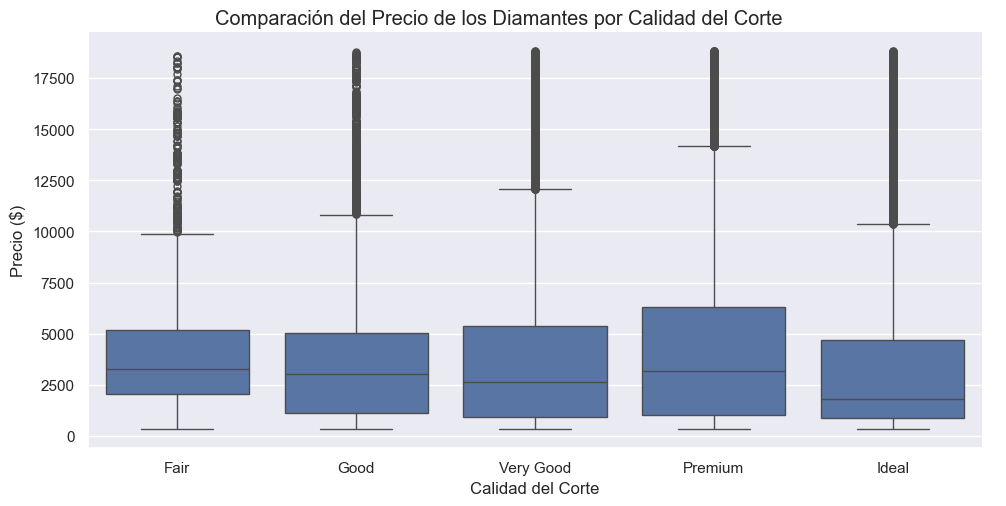

In [8]:
# Creando el gráfico catplot de tipo 'box'
g = sns.catplot(data=diamonds,
                kind="box",
                x="cut",
                y="price",
                height=5,
                aspect=2,
                order=["Fair", "Good", "Very Good", "Premium", "Ideal"])

# Estableciendo título
g.fig.suptitle('Comparación del Precio de los Diamantes por Calidad del Corte',
               va='baseline',
               ha='center')

# Estableciendo etiquetas de ejes
g.set_axis_labels("Calidad del Corte",
                  "Precio ($)");

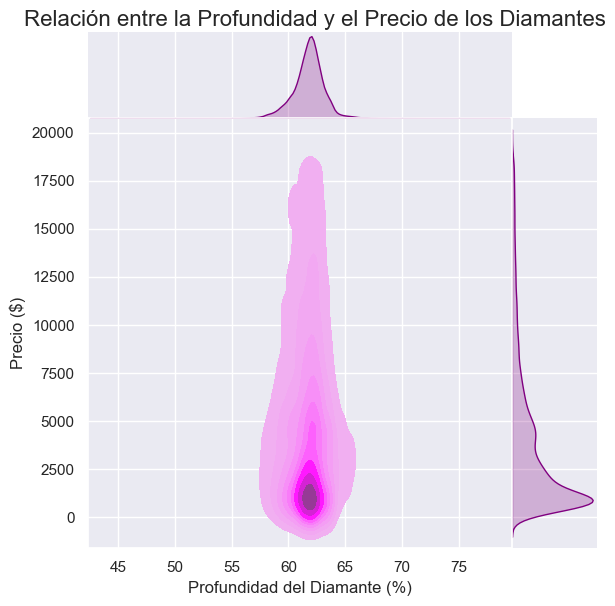

In [9]:
# Utilizando jointplot para visualizar la relación entre 'depth' y 'price' con un gráfico de densidad kernel
g = sns.jointplot(data=diamonds,
                  x="depth",
                  y="price",
                  kind="kde",
                  fill=True,
                  space=0,
                  color="purple")

# Cambiando las etiquetas de los ejes
g.set_axis_labels("Profundidad del Diamante (%)",
                  "Precio ($)")

# Mejorando el título
g.fig.suptitle('Relación entre la Profundidad y el Precio de los Diamantes',
               va='baseline',
               ha='center',
               fontsize=16);

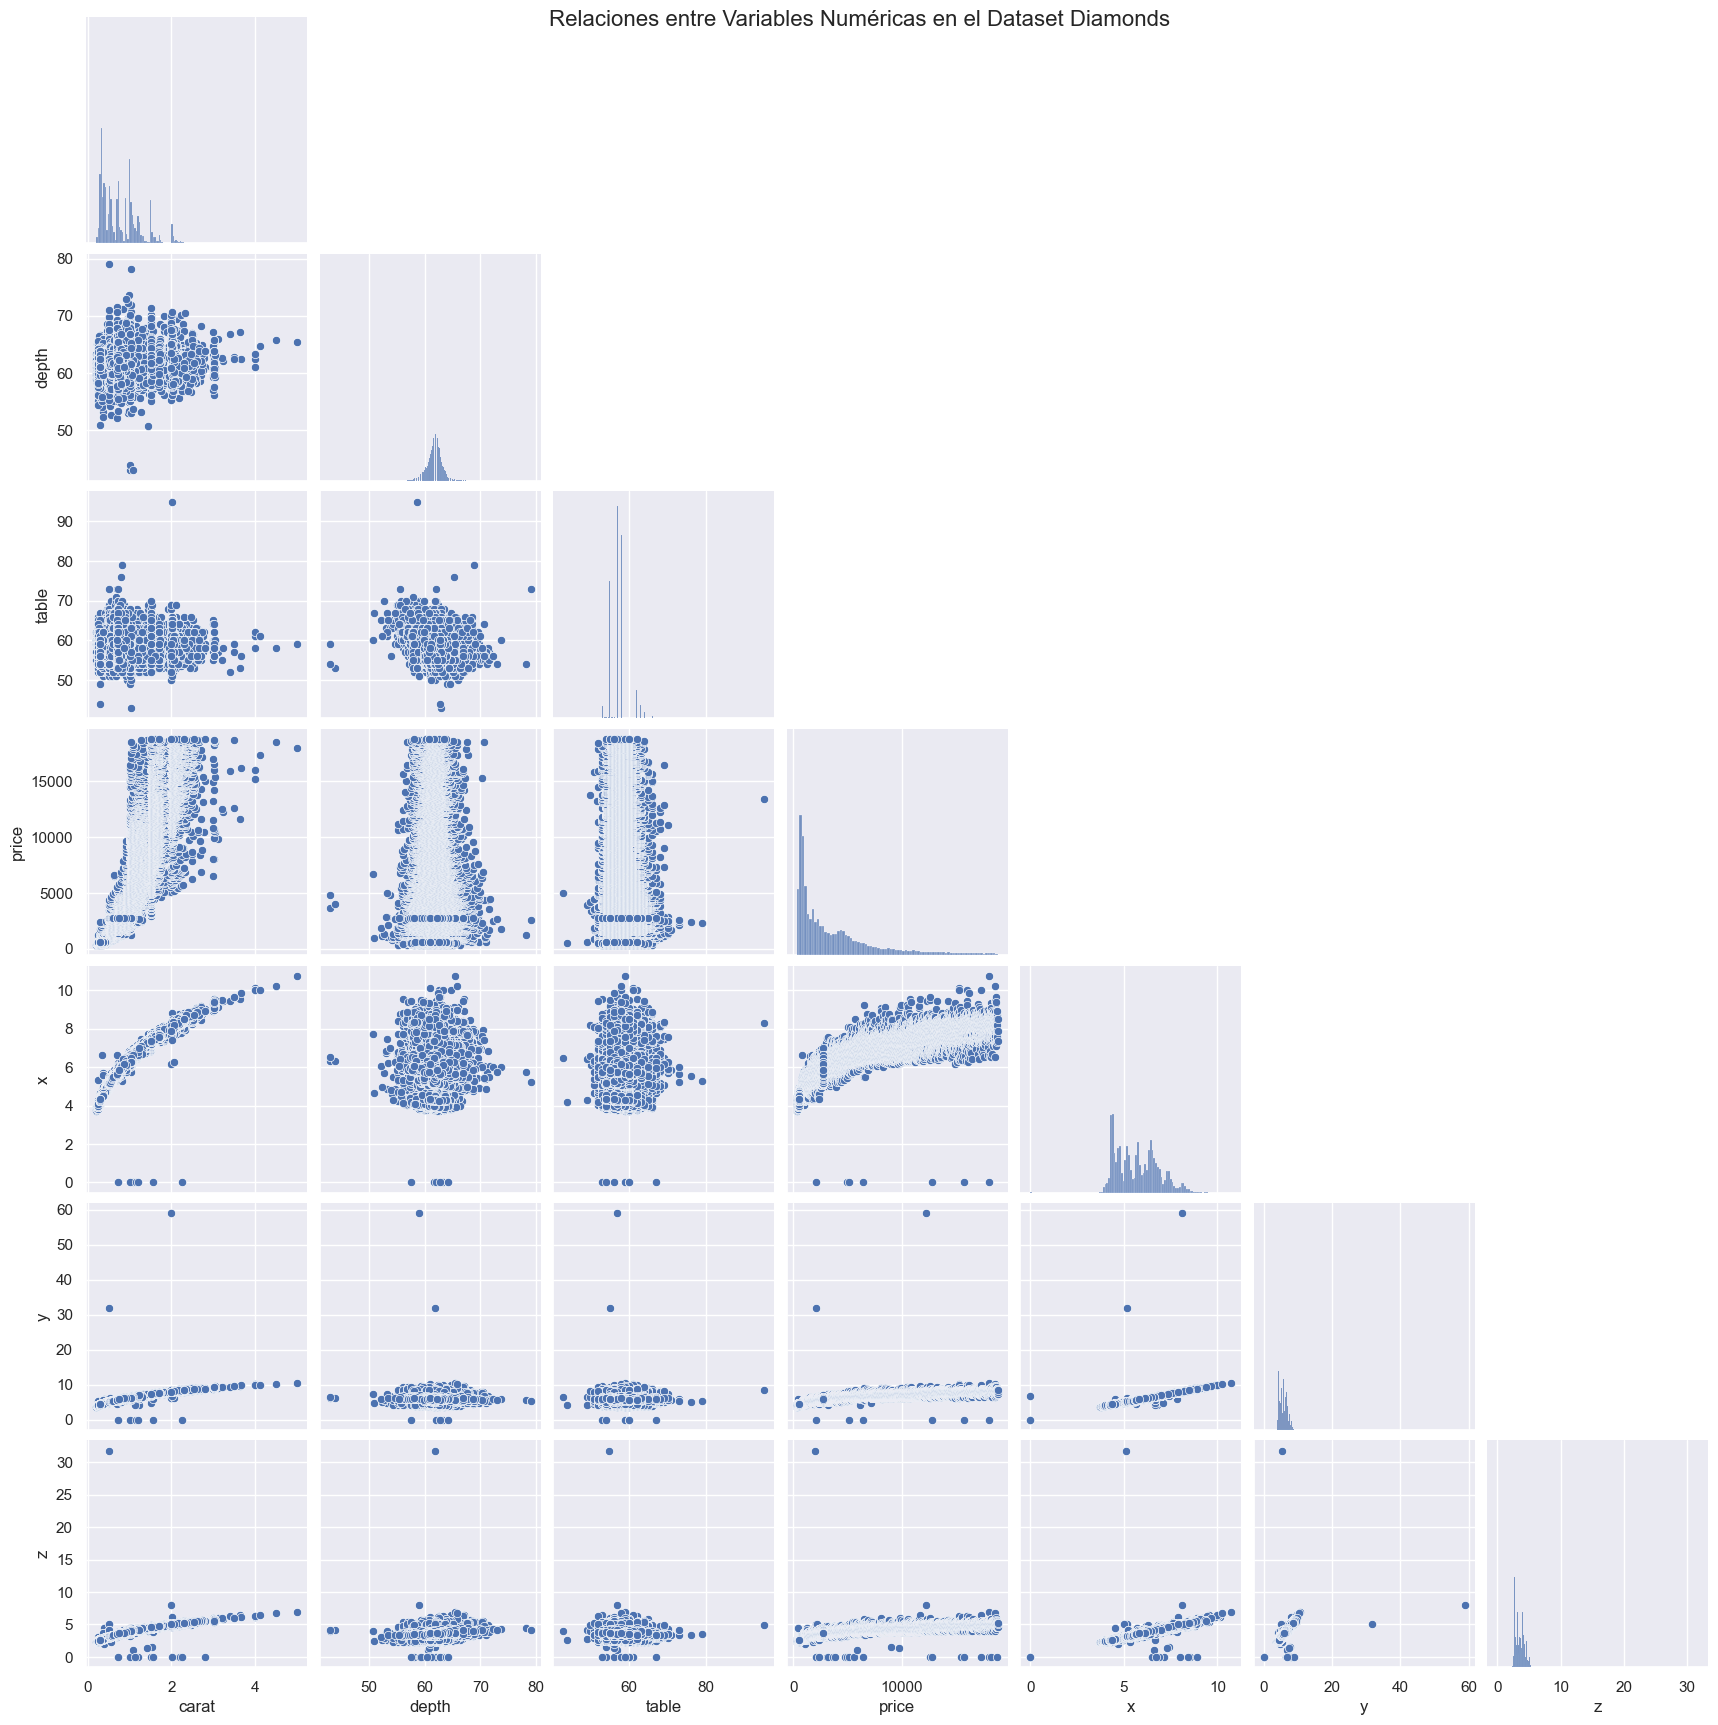

In [10]:
# Creando el pairplot para el dataset diamonds, Seaborn ignorará automáticamente las variables no numéricas
g = sns.pairplot(diamonds,
                corner=True)

# Mejorando el título con plt.subplots_adjust y plt.suptitle para el gráfico generado
g.fig.suptitle('Relaciones entre Variables Numéricas en el Dataset Diamonds',
               va='baseline',
               ha='center',
               fontsize=16);